In [2]:
import numpy as np
from math import e

In [56]:
def fun_res(t,delta_t,t_decay,t_rise):
    
    a1= 1/(1+np.exp(-(t-delta_t)/(t_rise )))
    a2=np.exp(-(t-delta_t)/(t_decay ))
    
    return a2*a1

def fun_logst(t,delta_t,t_rise):
    return 1/(1+np.exp(-(t-delta_t)/(t_rise/np.exp(1))))

def fun_dec(t,delta_t,t_decay):
    a1=np.exp(-(t-delta_t)/t_decay)
    return a1


def f_x_peak(delta_t,t_d,t_r):
    a=t_r/(t_d-t_r)
    return delta_t-t_r*np.log(a)




In [57]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a+b*x**c

In [58]:
def do_analysis(fp_factor,t_r,delta_t,t_d_min_frac=3,t_max_farc=100,t_d_min_frac_plot=3,N=100):
    %matplotlib inline
    
    t_d_=np.linspace(t_d_min_frac*3,t_d_min_frac*100,N)
    r_r=np.zeros(N)
    r_d=np.zeros(N)
    r_r_frac=np.zeros(N)
    r_d_frac=np.zeros(N)
    for ID,t_d in enumerate(t_d_):
        x_peak=f_x_peak(delta_t,t_d,t_r)
        f_peak=fun_res(x_peak,delta_t,t_d,t_r)
        t=np.linspace(f_peak-t_r*5,f_peak+t_d*2,100000)
        y=fun_res(t,delta_t,t_d,t_r)
        y_r=y-f_peak*fp_factor
        r=np.where(np.sign(y_r[:-1]) != np.sign(y_r[1:]))[0] + 1
        t_r_true=x_peak-t[r[0]]
        t_d_true=t[r[1]]-x_peak
        r_r[ID]=(t_r_true/t_r)
        r_d[ID]=(t_d_true/t_d)
        
        
    
        
        
    fig=plt.figure(dpi=100)
    plt.plot(t_d_,r_r,label='r')
    plt.plot(t_d_,r_d,label='d')
    plt.legend()

   
    fig=plt.figure(dpi=100)
    plt.plot(t_d_,r_d,label='d')
    popt_d, pcov = curve_fit(func, t_d_, r_d,maxfev=10000,p0=[1,1,-1])
    plt.plot(t_d_, func(t_d_, *popt_d))
    plt.legend()
    print('t_d',popt_d)
    
     
    fig=plt.figure(dpi=100)
    plt.plot(t_d_,r_r,label='r')
    popt_r, pcov = curve_fit(func, t_d_, r_r,p0=[1,1,2])
    plt.plot(t_d_, func(t_d_, *popt_r))
    plt.legend()
    print('t_r',popt_r)

    r_r_frac=np.zeros(N)
    r_d_frac=np.zeros(N)
    for ID,t_d in enumerate(t_d_):    
        c_r=func(t_d, *popt_r)
        c_d=func(t_d, *popt_d)
        x_peak=f_x_peak(delta_t,t_d,t_r)
        f_peak=fun_res(x_peak,delta_t,t_d,t_r)
        f_t_r=fun_res(delta_t-(t_r*c_r),delta_t,t_d,t_r)
        f_t_d=fun_res(delta_t+(t_d*c_d),delta_t,t_d,t_r)
        t=np.linspace(f_peak-t_r*5,f_peak+t_d*2,100000)
        y=fun_res(t,delta_t,t_d,t_r)
        y_r=y-f_peak*fp_factor
        r=np.where(np.sign(y_r[:-1]) != np.sign(y_r[1:]))[0] + 1
        t_r_true=x_peak-t[r[0]]
        t_d_true=t[r[1]]-x_peak

        r_r_frac[ID]=(t_r_true-(t_r*c_r))/t_r_true
        r_d_frac[ID]=(t_d_true-(t_d*c_d))/t_d_true


    
 
    fig=plt.figure(dpi=100)
    plt.plot(t_d_,np.fabs(r_r_frac),label='r')
    plt.axhline(0,ls='--')
    plt.ylabel('abs rel.error')
    plt.xlabel('t_d/t_r')
    plt.legend()
    
    
    fig=plt.figure(dpi=100)
    plt.plot(t_d_,np.fabs(r_d_frac),label='d')
    plt.axhline(0,ls='--')
    plt.ylabel('abs rel.error')
    plt.xlabel('t_d/t_r')
    plt.legend()
    
   
    fig=plt.figure(dpi=100)
    
    t_d=t_r*t_d_min_frac_plot
    t=np.linspace(f_peak-t_r*5,f_peak+t_d*2,100000)

    x_peak=f_x_peak(delta_t,t_d,t_r)
    
    dp=delta_t-x_peak
    fp=fun_res(x_peak,delta_t,t_d,t_r)

    t_rise_th=t_r*func(t_d, *popt_r)
    t_dec_th=t_d*func(t_d, *popt_d)
    
    y=fun_res(t,delta_t,t_d,t_r)
    y1=fun_logst(t,delta_t,t_r)
    y2=fun_dec(t,delta_t,t_d)
    y_r=y-fp*fp_factor
    
    
    print('-->',t_d,t_r,delta_t)
    print('-->',x_peak,t_rise_th,delta_t)
    
    plt.plot(t,y)
    

    plt.plot(t,y1,'--')
    plt.plot(t,y2,'--')

    plt.axvline(x_peak,c='purple')

    plt.axhline(fp*fp_factor,ls='--')

    r=np.where(np.sign(y_r[:-1]) != np.sign(y_r[1:]))[0] + 1
    plt.axvline(t[r[0]],c='black')
    plt.axvline(t[r[1]],c='black')

    plt.axvline(x_peak-t_rise_th,ls='--',c='red')
    plt.axvline(x_peak+t_dec_th,ls='--',c='red')


    print(np.fabs(x_peak-t[r]))

    plt.ylim(0,y.max()+1)


T rise

t_d [ 0.69507109  1.25694172 -1.08338389]
t_r [0.54521938 1.33774412 0.24762166]
--> 3 1 0
--> 0.6931471805599453 2.301195516721523 0
[2.4484765  3.23759036]


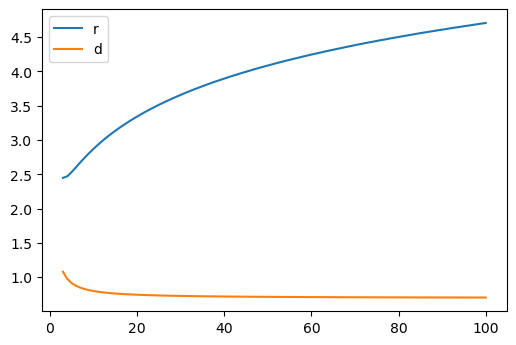

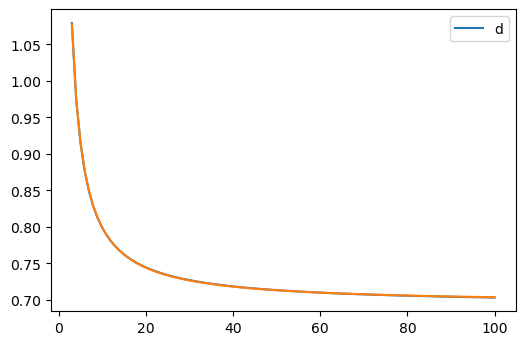

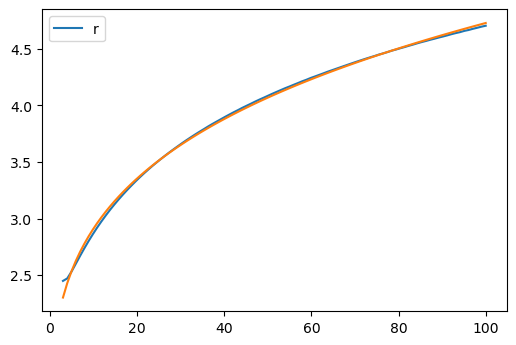

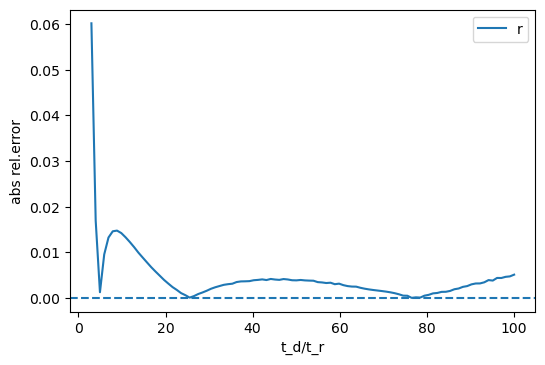

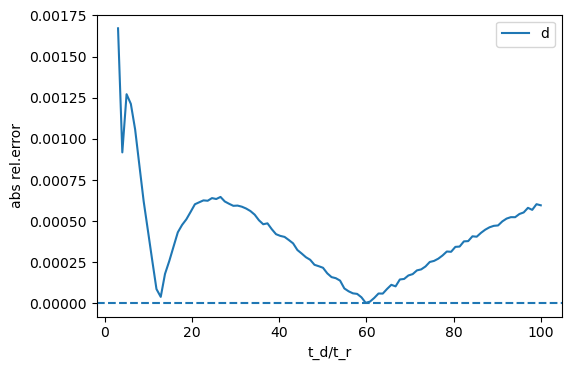

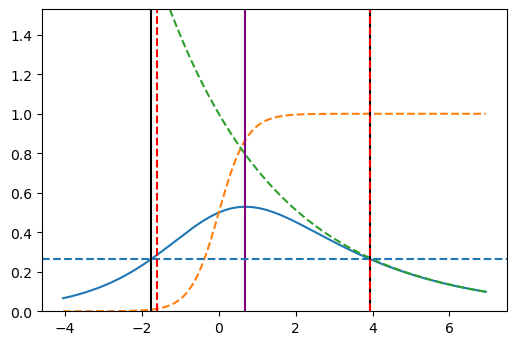

In [59]:
do_analysis(0.5,1,0,t_d_min_frac=1,t_d_min_frac_plot=3)

T decay

t_d [ 1.00269391  1.3238814  -1.10863952]
t_r [1.17427772 1.23390989 0.25995647]
--> 3 1 0
--> 0.6931471805599453 2.8160548556445635 0
[3.00630133 4.19393067]


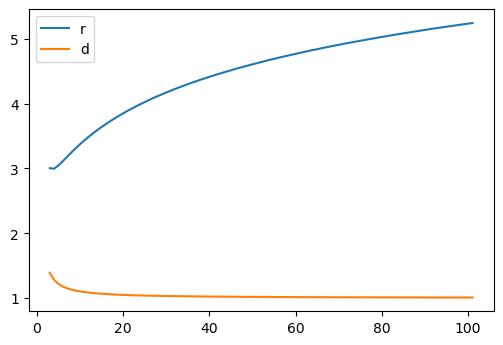

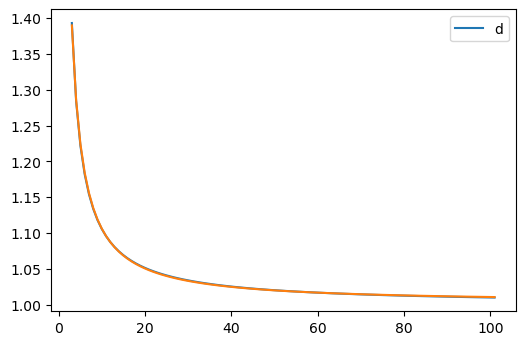

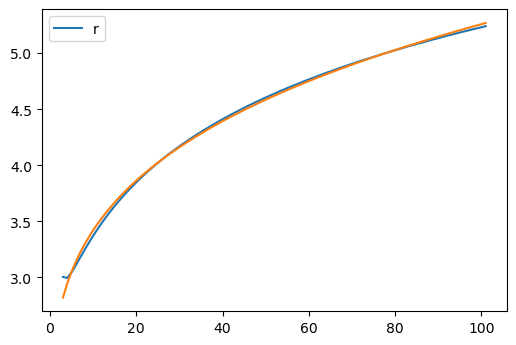

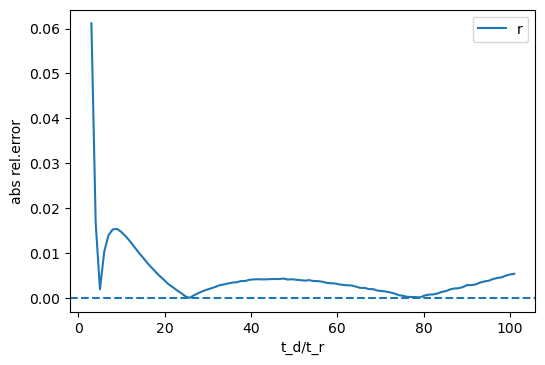

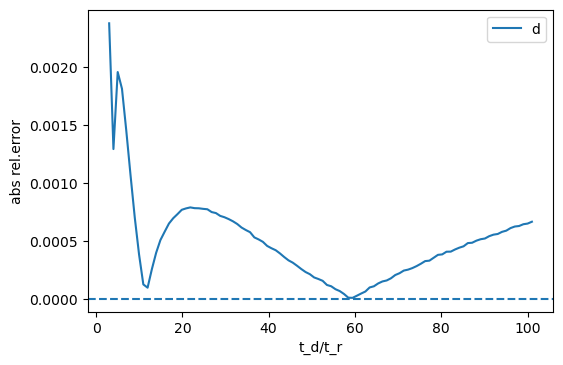

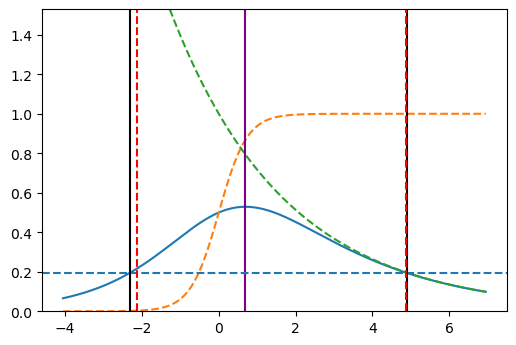

In [60]:
do_analysis(1/e,1,0,t_d_min_frac=1.01,t_d_min_frac_plot=3)

--> 15 1 5
[2.00579952 4.36866423]


(0.0, 1.782759307719131)

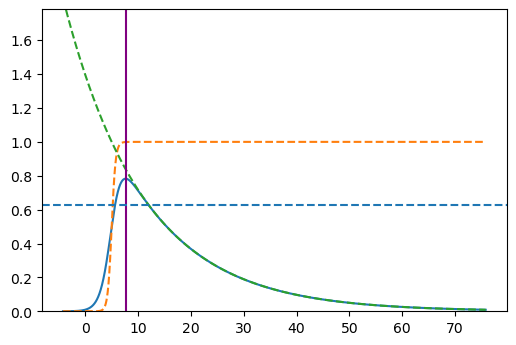

In [63]:
%matplotlib inline
t_r=1
t_d=15
delta_t=5
fp_factor=0.8
x_peak=f_x_peak(delta_t,t_d,t_r)
f_peak=fun_res(x_peak,delta_t,t_d,t_r)
t=np.linspace(f_peak-t_r*5,f_peak+t_d*5,100000)
y=fun_res(t,delta_t,t_d,t_r)
y_r=y-f_peak*fp_factor
r=np.where(np.sign(y_r[:-1]) != np.sign(y_r[1:]))[0] + 1
t_r_true=x_peak-t[r[0]]
t_d_true=t[r[1]]-x_peak


fig=plt.figure(dpi=100)

t=np.linspace(f_peak-t_r*5,f_peak+t_d*5,100000)

x_peak=f_x_peak(delta_t,t_d,t_r)

dp=delta_t-x_peak
fp=fun_res(x_peak,delta_t,t_d,t_r)

#t_rise_th=t_r*func(t_d, *popt_r)
#t_dec_th=t_d*func(t_d, *popt_d)

y=fun_res(t,delta_t,t_d,t_r)
y1=fun_logst(t,delta_t,t_r)
y2=fun_dec(t,delta_t,t_d)
y_r=y-fp*fp_factor


print('-->',t_d,t_r,delta_t)
#print('-->',x_peak,t_rise_th,delta_t)

plt.plot(t,y)


plt.plot(t,y1,'--')
plt.plot(t,y2,'--')

plt.axvline(x_peak,c='purple')

plt.axhline(fp*fp_factor,ls='--')

#r=np.where(np.sign(y_r[:-1]) != np.sign(y_r[1:]))[0] + 1
#plt.axvline(t[r[0]],c='black')
#plt.axvline(t[r[1]],c='black')

#plt.axvline(x_peak-t_rise_th,ls='--',c='red')
#plt.axvline(x_peak+t_dec_th,ls='--',c='red')


print(np.fabs(x_peak-t[r]))

plt.ylim(0,y.max()+1)


